In [1]:
import imageio
from skimage.io import imread, imsave, imshow
from skimage.exposure import rescale_intensity
from skimage import exposure
import os
import numpy as np
from pathlib import Path
import re
import ntpath
import random
import matplotlib.pyplot as plt
from PIL import Image
from PIL import ImageOps
import PIL

In [2]:
image_path = '/proj/telston_lab/projects/data/2023_03_30_softgel_s1'

In [3]:
#lists all the files that are within imagesfolder and stores them in a variable called "imagenames"
imagenames=os.listdir(image_path)

(0.0, 25000.0)

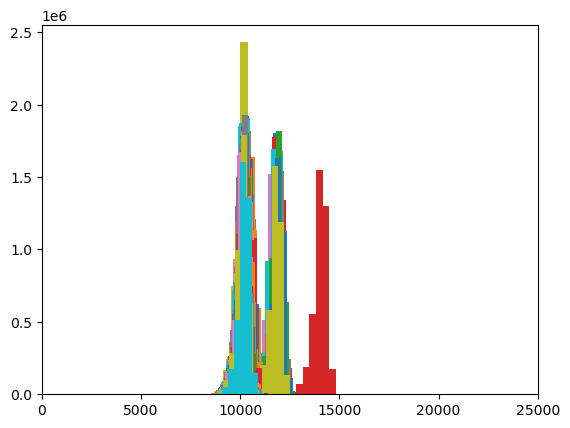

In [4]:
#plot histogram of image intensities 
for i in range(len(imagenames)):
  if imagenames[i].endswith('.tif'):
    image=imread(image_path + '/' +imagenames[i])
    plt.hist(image.ravel(),50)
plt.xlim(0,25000)

In [5]:
#Enter the minimum and maximum intensity values based upon the histogram generated above. Ensure that you capture the min and max values from the histogram.

#minimum intensity value
min_val = 8000 
#maximum intensity value
max_val = 15000 

In [8]:
#get images, rescale intensity, put them in 8 bit and rgb, save 
for imagename in imagenames:
  #rescale intensity for each image
  bright = rescale_intensity(imread(image_path + '/' + imagename),(min_val,max_val))
  #convert to 8 bit from 16 bit
  bright8b= (bright/256).astype('uint8')
  #convert gray to rgb
  brigth8b_rgb=np.stack((bright8b,bright8b,bright8b),axis=2)
  imsave(image_path + '/' + imagename, brigth8b_rgb)

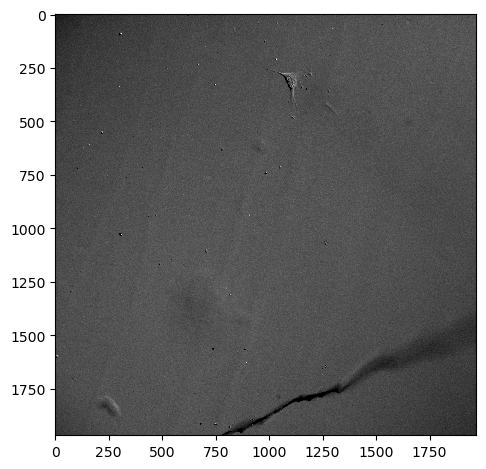

In [9]:
#display an image after performing the intensity rescaling and make sure it looks good - if not, go back and adjust the min and max intensity values
image=imread(image_path + '/' + imagenames[1])
imshow(image)

In [15]:
#function that pads an array to make it a sqaure
#note: if the array is already a square it doesn't pad
def pad_with_zeros_to_square_applymodel(img):
  x_dim = np.shape(img)[0]
  y_dim = np.shape(img)[1]

  diff = x_dim - y_dim
  
  if diff < 0:
    pad_img = np.pad(img, ((0, np.abs(diff)),(0,0),(0,0)),'constant', constant_values=0)
  if diff > 0:
    pad_img = np.pad(img, ((0, 0),(0,np.abs(diff)),(0,0)),'constant', constant_values=0)
  elif diff == 0:
    pad_img = img
  return pad_img

In [16]:
#Pad images to make them a square

for imagename in imagenames:
  image = imread(image_path + '/' + imagename)
  image = pad_with_zeros_to_square_applymodel(image)
  imsave(image_path + '/' + imagename, image)